### EDA of the Database ElecDeb60to20

loaded fallacy_second_version.csv from GitHub

In [234]:
import pandas as pd

In [235]:
df = pd.read_csv('../data/9_Goffredo_used_in_MAFALDA.csv', sep=';')

### Check if comments have different fallacies

In [236]:
df.text.duplicated().sum()

1152

In [237]:
exact_duplicates = df[df.duplicated()]
print(f"Number of exact duplicates across all columns: {len(exact_duplicates)}")

Number of exact duplicates across all columns: 1104


In [238]:
# Group by the 'comment' column and aggregate unique fallacy labels
fallacy_analysis = (
    df.groupby('text')['fallacy']
    .apply(lambda x: list(x.unique()))  # Get unique fallacy labels per comment
    .reset_index()
)

In [239]:
# Add a column to count how many unique fallacy labels exist per comment
fallacy_analysis['num_fallacies'] = fallacy_analysis['fallacy'].apply(len)

In [240]:
# Filter for comments that have more than one unique fallacy label
comments_with_multiple_fallacies = fallacy_analysis[fallacy_analysis['num_fallacies'] > 1]['text']

In [241]:
# Display the results
print("Comments with multiple fallacy labels:")
print(comments_with_multiple_fallacies)

Comments with multiple fallacy labels:
57      And I think you get a certain arrogance, burea...
61      And I'll tell you, I had a town hall meeting i...
230     But the important thing is, if we suffer defea...
538     In this Administration we've stopped them at Q...
822     The position of the United States has been tha...
1216                                             disaster
1217                                             disgrace
1367                                               racist
1529                              trumped-up trickle-down
1577                                           xenophobic
Name: text, dtype: object


In [242]:
# Count the number of comments with more than one unique fallacy label
num_comments_with_multiple_fallacies = fallacy_analysis[fallacy_analysis['num_fallacies'] > 1].shape[0]

# Print the result
print(f"Number of comments with more than one unique fallacy: {num_comments_with_multiple_fallacies}")

Number of comments with more than one unique fallacy: 10


### only drop comments that do not have more than one unique fallacy

In [243]:
# Step 4: Filter the original DataFrame
df_filtered = df[
    (df['text'].isin(comments_with_multiple_fallacies)) |  # Keep texts with multiple fallacies
    (~df.duplicated(subset=['text']))  # Keep unique rows for texts with a single fallacy
]

# Step 5: Reset index for clarity
df_filtered = df_filtered.reset_index(drop=True)


# Reset index for clarity
df = df_filtered.reset_index(drop=True)

In [244]:
df.text.duplicated().sum()

50

In [245]:
exact_duplicates = df[df.duplicated()].sum()
print(f"Number of exact duplicates across all columns: {len(exact_duplicates)}")

Number of exact duplicates across all columns: 8


In [246]:
# Group by the 'comment' column and aggregate unique fallacy labels
fallacy_analysis = (
    df.groupby('text')['fallacy']
    .apply(lambda x: list(x.unique()))  # Get unique fallacy labels per comment
    .reset_index())

# Add a column to count how many unique fallacy labels exist per comment
fallacy_analysis['num_fallacies'] = fallacy_analysis['fallacy'].apply(len)

# Filter for comments that have more than one unique fallacy label
comments_with_multiple_fallacies = fallacy_analysis[fallacy_analysis['num_fallacies'] > 1]['text']

# Display the results
print("Comments with multiple fallacy labels:")
print(comments_with_multiple_fallacies)

Comments with multiple fallacy labels:
57      And I think you get a certain arrogance, burea...
61      And I'll tell you, I had a town hall meeting i...
230     But the important thing is, if we suffer defea...
538     In this Administration we've stopped them at Q...
822     The position of the United States has been tha...
1216                                             disaster
1217                                             disgrace
1367                                               racist
1529                              trumped-up trickle-down
1577                                           xenophobic
Name: text, dtype: object


### saving file

In [247]:
df.to_csv('../data/9_Goffredo_used_in_MAFALDA_cleaned.csv', index=False)

### some EDA

In [8]:
df.head()

,Year,Date,SectionID,text,fallacy,subcategory,Speaker,real_date
0,1992,15Oct,7,"And I think you get a certain arrogance, burea...",Ad Hominem,Ad Hominem,BUSH,15 10 1992
1,1992,13Oct,8,Bill Clinton simply has trouble telling the tr...,Ad Hominem,Ad Hominem,QUAYLE,13 10 1992
2,1992,13Oct,8,Bill Clinton simply has trouble telling the tr...,Ad Hominem,Ad Hominem,QUAYLE,13 10 1992
3,2016,26Sep,3,he has a long record of engaging in racist beh...,Ad Hominem,Ad Hominem,CLINTON,26 9 2016
4,2016,26Sep,5,she's got no business ability,Ad Hominem,Ad Hominem,TRUMP,26 9 2016


In [9]:
df.Year.sort_values(ascending=False)

927     2020
237     2020
2278    2020
2277    2020
2276    2020
        ... 
1028    1960
800     1960
2031    1960
2032    1960
2600    1960
Name: Year, Length: 2744, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         2744 non-null   int64 
 1   Date         2744 non-null   object
 2   SectionID    2744 non-null   int64 
 3   text         2744 non-null   object
 4   fallacy      2744 non-null   object
 5   subcategory  2744 non-null   object
 6   Speaker      2697 non-null   object
 7   real_date    2744 non-null   object
dtypes: int64(2), object(6)
memory usage: 171.6+ KB


In [11]:
df['subcategory'].unique()

array(['Ad Hominem', 'Appeal to hypocrisy', 'Circumstantial Ad Hominem',
       'Name-Calling, Labeling', 'Tu quoque', 'Appeal to Authority',
       'Appeal to Authority without evidence',
       'Appeal to false authority', 'Appeal to fear', 'Popular Opinion',
       'False Authority', 'Without Evidence', 'Appeal to Emotion',
       'Appeal to pity', 'Flag waving', 'Loaded Language', 'False Cause',
       'Slippery Slope', 'Slogan', 'Slogans'], dtype=object)

In [12]:
df['subcategory'].nunique()

20

In [13]:
df['fallacy'].unique()

array(['Ad Hominem', 'Appeal to Emotion', 'Appeal to Authority',
       'Slippery Slope', 'False Cause', 'Slogans'], dtype=object)

In [14]:
df['fallacy'].nunique()

6

In [15]:
fallacy_counts = df.groupby('fallacy')['text'].count().sort_values(ascending=False)

print("Fallacy counts:")
print(fallacy_counts)

print(f"\nTotal number of unique fallacies: {len(fallacy_counts)}")

Fallacy counts:
fallacy
Appeal to Emotion      1591
Appeal to Authority     433
Ad Hominem              341
False Cause             179
Slippery Slope          122
Slogans                  78
Name: text, dtype: int64

Total number of unique fallacies: 6


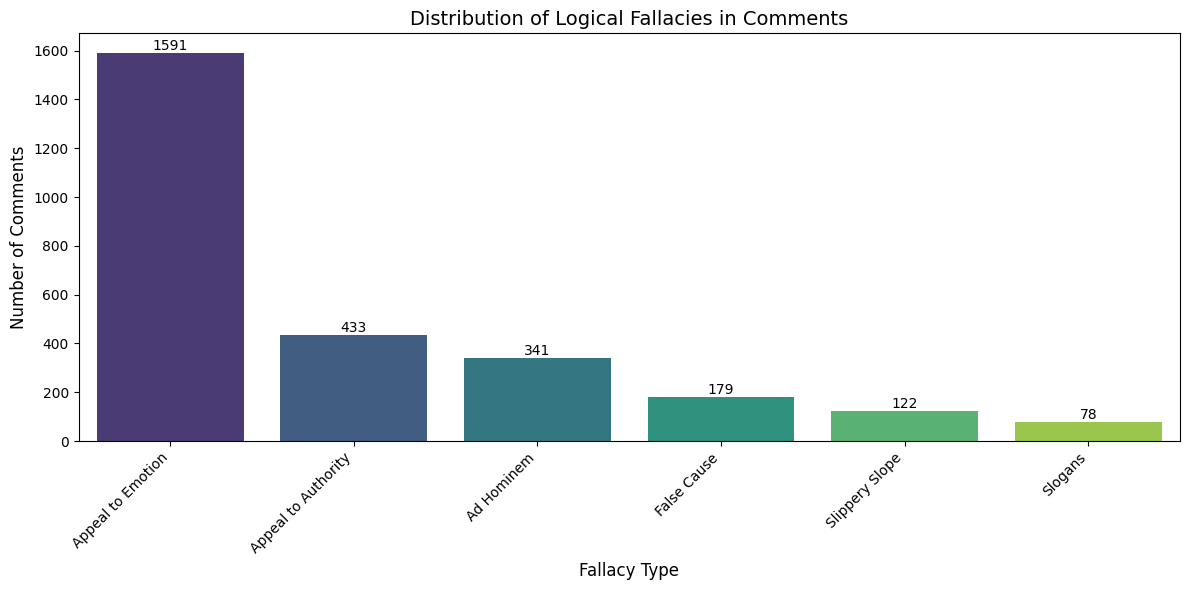

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(12, 6))
sns.barplot(x=fallacy_counts.index, y=fallacy_counts.values, palette="viridis")

# Customize plot
plt.title("Distribution of Logical Fallacies in Comments", fontsize=14)
plt.xlabel("Fallacy Type", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on bars
for i, value in enumerate(fallacy_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()